In [84]:
import pandas as pd
import re
import os
from itertools import chain,cycle, islice
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, display_html
from mlxtend.preprocessing import standardize

In [3]:
# Do not truncate column content and show all columns
pd.set_option('display.max_colwidth', None)

# Update output cell format to display mutliple objects (dataframes)
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h4>{title}</h4>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

    
prefix = '../../data/'
filePaths = {
    "reviews": prefix + 'yelp_academic_dataset_review.json',
    "businesses": prefix + 'yelp_academic_dataset_business.json',
    "checkins": prefix + 'yelp_academic_dataset_checkin.json',
    "tips": prefix + 'yelp_academic_dataset_tip.json',
    "users": prefix + 'yelp_academic_dataset_user.json'
}

***
# Users json

## Data Pre-Processing: User Features and Users

---

## Problem Description:
* Remove redundant attributes through correlation analysis
* Normalize user attributes

## Reduce User attributes

In [21]:
pottentialCols = {'review_count','average_stars','fans', 'useful', 'funny', 'cool',
               'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 
               'compliment_list', 'compliment_note','compliment_plain','compliment_cool', 
               'compliment_funny','compliment_writer','compliment_photos'}

# Reader and filter each frame 
userReader = pd.read_json(
    filePaths["users"], 
    lines=True,
    chunksize=100000 # Dataframe size
)

frames = []
for df in itertools.islice(userReader, 20):
    df = df.filter(items=list(pottentialCols))
    frames.append(df)
    
df = pd.concat(frames)
df.head()

,average_stars,cool,compliment_writer,review_count,compliment_cool,compliment_list,compliment_profile,compliment_cute,fans,compliment_photos,funny,compliment_note,compliment_funny,useful,compliment_hot,compliment_plain,compliment_more
0,3.57,227,10,553,22,1,1,0,14,0,225,11,22,628,3,15,2
1,3.84,400,21,564,63,1,5,2,27,5,316,33,63,790,36,37,4
2,3.44,103,4,60,17,0,0,1,5,1,125,3,17,151,9,7,6
3,3.08,84,2,206,7,0,0,0,6,0,160,7,7,233,2,14,1
4,4.37,512,19,485,31,1,2,1,78,31,400,22,31,1265,8,28,9


### Standardize with Z Scores

In [22]:
normal_data = standardize(df)
normal_data.head()

,average_stars,cool,compliment_writer,review_count,compliment_cool,compliment_list,compliment_profile,compliment_cute,fans,compliment_photos,funny,compliment_note,compliment_funny,useful,compliment_hot,compliment_plain,compliment_more
0,-0.066597,0.460587,0.283421,6.917060,0.221705,0.093280,0.053909,-0.013893,0.752085,-0.012082,0.585725,0.163662,0.221705,1.145746,0.014105,0.125330,0.133268
1,0.163675,0.848724,0.632086,7.060397,0.695612,0.093280,0.319249,0.158210,1.531686,0.042109,0.842022,0.537651,0.695612,1.461318,0.470594,0.352264,0.290093
2,-0.177469,0.182384,0.093240,0.492958,0.163912,-0.007042,-0.012426,0.072159,0.212362,-0.001244,0.304080,0.027666,0.163912,0.216562,0.097103,0.042808,0.446918
3,-0.484499,0.139756,0.029847,2.395430,0.048325,-0.007042,-0.012426,-0.013893,0.272331,-0.012082,0.402656,0.095664,0.048325,0.376296,0.000272,0.115015,0.054856
4,0.615691,1.100004,0.568692,6.030977,0.325734,0.093280,0.120244,0.072159,4.590118,0.323903,1.078604,0.350657,0.325734,2.386607,0.083270,0.259427,0.682155


### Correlation Analysis on attributes (Pearson correlation coefficient)

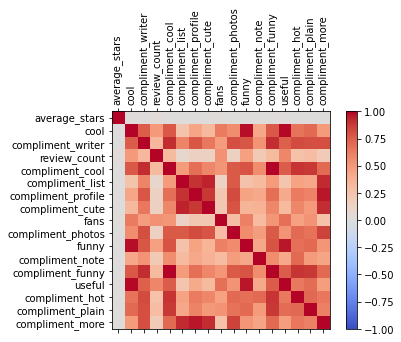

None

In [23]:
# Calculate Pearson correlation coefficient amongst variables
data = normal_data
corr = data.corr()

# Create correlation matrix chart
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

# Set and orient labels 
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)


display(plt.show())

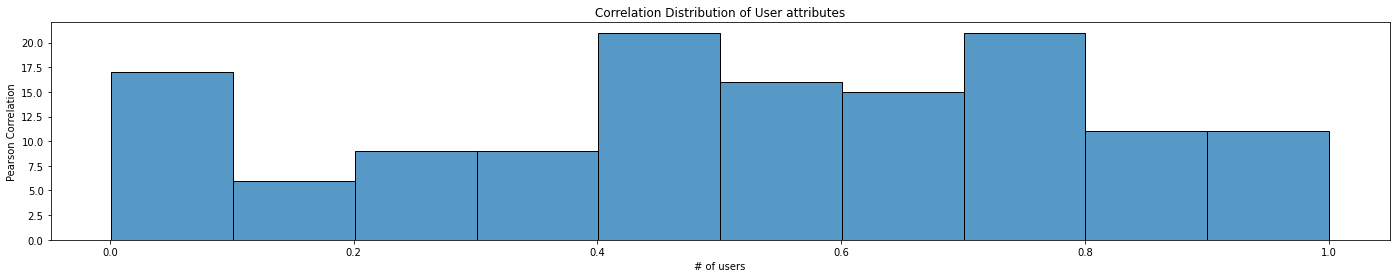

,average_stars,cool,compliment_writer,review_count,compliment_cool,compliment_list,compliment_profile,compliment_cute,fans,compliment_photos,funny,compliment_note,compliment_funny,useful,compliment_hot,compliment_plain,compliment_more
average_stars,NaN,0.009252,0.005894,0.034043,0.006392,0.001286,0.002332,0.002489,0.016756,0.002914,0.005855,0.003296,0.006392,0.008736,0.005383,0.005779,0.003532
cool,NaN,NaN,0.760133,0.492416,0.780957,0.253516,0.431014,0.327230,0.636169,0.555353,0.978600,0.424718,0.780957,0.989284,0.666550,0.705243,0.489117
compliment_writer,NaN,NaN,NaN,0.328206,0.917422,0.597388,0.787464,0.655319,0.478454,0.804763,0.785020,0.523926,0.917422,0.745732,0.823720,0.811492,0.810460
review_count,NaN,NaN,NaN,NaN,0.316315,0.091029,0.139655,0.133913,0.538026,0.136718,0.467111,0.198496,0.316315,0.584840,0.271392,0.294543,0.193472
compliment_cool,NaN,NaN,NaN,NaN,NaN,0.488041,0.691944,0.590757,0.510323,0.768335,0.791430,0.562139,1.000000,0.759576,0.898046,0.885506,0.709951
compliment_list,NaN,NaN,NaN,NaN,NaN,NaN,0.902160,0.943954,0.128582,0.770402,0.263546,0.317595,0.488041,0.242142,0.447094,0.424765,0.928165
compliment_profile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885844,0.220477,0.826697,0.448268,0.420554,0.691944,0.411176,0.637221,0.607839,0.961648
compliment_cute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226329,0.793764,0.344166,0.363723,0.590757,0.314287,0.589955,0.495077,0.915432
fans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289664,0.613281,0.307748,0.510323,0.681132,0.455361,0.523767,0.271735
compliment_photos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566128,0.477403,0.768335,0.525420,0.708002,0.676382,0.854168


None

In [24]:
# source: https://stackoverflow.com/questions/41128456/pandas-filter-across-all-columns


# Remove duplicate attribute pairs in symmetric matrix
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_triu_stacked = corr_triu.stack()


fig, (ax1) = plt.subplots(1,1,figsize=(24,4))
sns.histplot(corr_triu_stacked, bins=10, ax=ax1)
ax1.set(title=f'Correlation Distribution of User attributes', xlabel='# of users', ylabel='Pearson Correlation')
display(corr_triu,plt.show())

In [27]:
# Remove redundant pairs denoted by high correlation (pearson score < .20 )
keepPairs = {key:val for key,val in corr_triu_stacked.items() if (val < .25)} 

keepCols = set() 
for pair,val in keepPairs.items():
    keepCols.add(pair[0])
dropUserAtrributes = pottentialCols - keepCols

print(f"keep these columns: {keepCols}")
print(f"drop these columns: {dropUserAtrributes}")

keep these columns: {'compliment_profile', 'compliment_cute', 'average_stars', 'review_count', 'compliment_list'}
drop these columns: {'compliment_more', 'fans', 'compliment_photos', 'funny', 'compliment_note', 'compliment_funny', 'useful', 'compliment_writer', 'cool', 'compliment_hot', 'compliment_plain', 'compliment_cool'}


## Export Trimmed Users json

In [28]:
chunksize = 1000000
userReader = pd.read_json(filePaths['users'], lines=True,
                      dtype={'user_id':str,'name':str, 'yelping_since':str, 'friends':list, 'elite': list, # Key cols to keep, that were not subject to correlation filter
                             'review_count':int, 'cool':int, 'fans':int, 'average_stars': float,'business_id':str,'stars':int,
                             'compliment_cool':int, 'compliment_list':int, 'compliment_profile':int, 'compliment_plain':int
                            },
                      chunksize=chunksize)

In [29]:
# Collect all df chunks 
frames = []
for userChunk in userReader:
    userChunk = userChunk.drop(dropUserAtrributes, axis=1)
    # Show feedback on progress
    print(f"{userChunk.shape[0]} merged out of {chunksize:,} users")
    frames.append(userChunk)
    
dfUsers = pd.concat(frames, ignore_index=True, axis=0)

1000000 merged out of 1,000,000 users
968703 merged out of 1,000,000 users


In [30]:
# concat all dataframe chunks into 1 datafram
dfUsers = pd.concat(frames, ignore_index=True, axis=0)

In [86]:
# Export to JSON and inspect
dfUsers.to_json(r'cleaned_users.json')

In [88]:
cleanedUsers = pd.read_json(os.path.abspath('') + "/cleaned_users.json", orient='records')
cleanedUsers.head(20)

,user_id,name,review_count,yelping_since,elite,friends,average_stars,compliment_profile,compliment_cute,compliment_list
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",3.57,1,0,1
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",3.84,5,2,1
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",3.44,0,1,0
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",3.08,0,0,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",4.37,2,1,1
5,z5_82komKV3mI4ASGe2-FQ,Steve,186,2007-02-27 07:09:40,2007,"E-fXXmALnZTPmzzL6rV4cQ, L2g6vS1GDfqLEpiDOFfCkA...",2.88,7,7,2
6,ttumcu6hWshk_EJVWrduDg,Stuart,12,2010-05-12 16:30:08,,"1pKOc55fFx09J5t2rPzTxw, HYpE14yYEKSgu3VNVzObHA...",4.00,0,0,0
7,f4_MRNHvN-yRn7EA8YWRxg,Jennifer,822,2011-01-17 00:18:23,"2011,2012,2013,2014,2015,2016,2017,2018","c-Dja5bexzEWBufNsHfRrQ, 02HJNyOzzYXvEKVApJb8GQ...",3.63,62,35,24
8,UYACF30806j2mfbB5vdmJA,Justin,14,2007-07-24 23:55:21,,"YwaKGmRNnSa3R3N4Hf9jLw, v9YpDzYkJarRbzvVIY-63g...",3.75,0,0,0
9,QG13XBbgHWydzThRBGJtyw,Claire,218,2007-06-04 00:14:10,"2008,2009","tnfVwTpuPlR6W2xEAMiqsg, Bd_16T8Dva27lF5LIrUmcQ...",4.10,1,5,3


***
## Subset Users: To reduce users further
Users with Low/Med and Users with High # of reviews

***Run by Group:***
- Potentially opportunity to cut down users, by taking subsets such as "normal users" and "power users"

In [44]:
print(f'# of users: {len(dfUsers)}')

# of users: 1968703


### Review Count Frequencies

In [45]:
print(f"Average # of reviews given, per user: {round(dfUsers['review_count'].mean(),2)}")
print(f"Users with 0 reviews: {len(dfUsers.loc[dfUsers['review_count']==0])}")

Average # of reviews given, per user: 22.17
Users with 0 reviews: 18


In [46]:
reviewCount = dfUsers['review_count'].to_list()

In [47]:
meduserThreshold = 50
superuserThreshold  = 100

smallReviewCount = [count for count in reviewCount if count <= meduserThreshold]
medReviewCount = [count for count in reviewCount if meduserThreshold < count <= superuserThreshold]
bigReviewCount = [count for count in reviewCount if superuserThreshold < count]

smallReviewPercent = round(len(smallReviewCount)/len(reviewCount)*100,2)
medReviewPercent = round(len(medReviewCount)/len(reviewCount)*100,2)
bigReviewPercent = round(len(bigReviewCount)/len(reviewCount)*100,2)

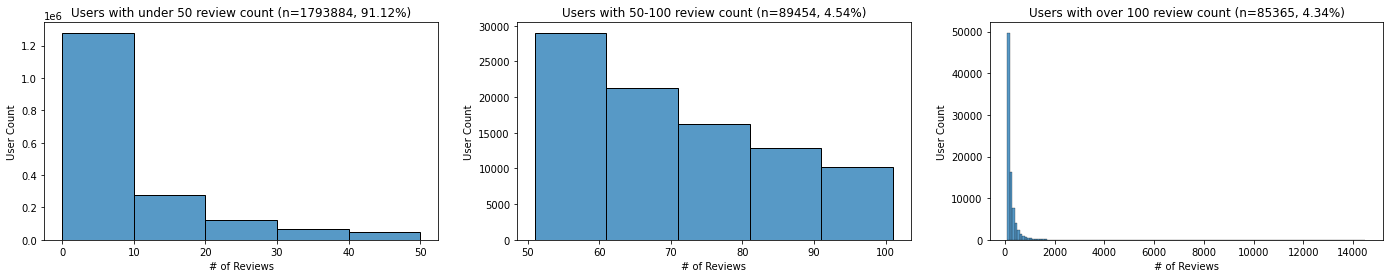

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24,4))
sns.histplot(smallReviewCount, binwidth=10, ax=ax1)
sns.histplot(medReviewCount, binwidth=10, ax=ax2)
sns.histplot(bigReviewCount, binwidth=100, ax=ax3)

ax1.set(title=f'Users with under {meduserThreshold} review count (n={len(smallReviewCount)}, {smallReviewPercent}%)', xlabel='# of Reviews', ylabel='User Count')
ax2.set(title=f'Users with {meduserThreshold}-{superuserThreshold} review count (n={len(medReviewCount)}, {medReviewPercent}%)', xlabel='# of Reviews', ylabel='User Count')
ax3.set(title=f'Users with over {superuserThreshold} review count (n={len(bigReviewCount)}, {bigReviewPercent}%)', xlabel='# of Reviews', ylabel='User Count')
plt.show()

***
***
# General EDA on Users

## Average stars and Review Count
### `user.average_stars` Analysis: comparing Super users vs Normal users 
> Super users are denoted by a review count > 100

In [49]:
print(f" 'Normal users' avg stars: {  round(dfUsers.loc[dfUsers['review_count'] <= superuserThreshold]['average_stars'].mean(),2)  }")
print(f" 'Super users' avg stars: {   round(dfUsers.loc[dfUsers['review_count'] > superuserThreshold]['average_stars'].mean(),2)  }")

 'Normal users' avg stars: 3.64
 'Super users' avg stars: 3.81


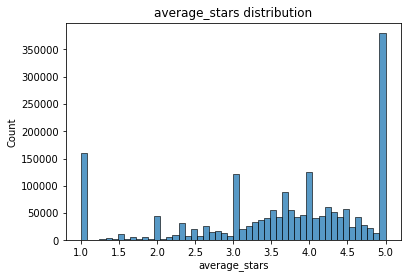

In [50]:
sns.histplot(dfUsers['average_stars'], bins=50).set(title='average_stars distribution')
plt.show()

### Users ordered by Review Count 
> By definition top and bottom 3, are super and normal users

In [51]:
pd.set_option('display.max_colwidth', 50)

In [52]:
dfUsers_sortedby_reviewCount = dfUsers.sort_values(by=['review_count'], ascending=False)
topUsers = dfUsers_sortedby_reviewCount.head(3)
bottomUsers = dfUsers_sortedby_reviewCount.tail(3)

display(topUsers, bottomUsers)

,user_id,name,review_count,yelping_since,elite,friends,average_stars,compliment_profile,compliment_cute,compliment_list
416,8k3aO-mPeyhbR5HUucA5aA,Victor,14455,2007-12-08 14:56:45,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","G2S8uIPRkyFNSs5os0hybA, y5HZivYR6HDOBwSDlddx6A...",3.28,210,55,84
14169,RtGqdDBvvBCjcu5dUqwfzA,Shila,12772,2010-10-17 06:35:06,"2012,2013,2014,2015,2016,2017,2018","hz79Mq7EGhHXZkIspAQtrg, HuBgs7uHyUz7DzcaScZqjg...",3.87,3,7,7
635,hWDybu_KvYLSdEFzGrniTw,Bruce,12487,2009-03-08 21:47:44,"2010,2011,2012,2013,2014,2015,2016,2017,2018","OK-GE2QwR_D3qi5jrX8RsA, gjhzKWsqCIrpEd9pevbKZw...",3.64,413,23,71


,user_id,name,review_count,yelping_since,elite,friends,average_stars,compliment_profile,compliment_cute,compliment_list
125809,AbbeFj9SPxOoHNKkeDVn6w,Janet,0,2017-07-11 06:37:38,,"fwwZK_bVBK-0ovQU8XCKBQ, etlj3-oBXWZDXFaF-684NA...",1.0,0,0,0
1474346,SoFv1NZbpnZdL051sVVXBA,Susanna,0,2017-09-16 21:26:12,,"588RSIeWljDTtZRcaGvB2w, vI2BFlKdFOpusSG4S0oEWg...",5.0,0,0,0
830420,0EoFWrwXLcY0HVmTqa13Bw,Amanda,0,2015-07-07 16:20:25,,"Vk7MRc1eBC9rWLYudTeueg, nO7l2G_dhnHmWeNHT-x0iA...",1.0,0,0,0


In [53]:
print( f"Top 100 users Avg stars: {round(dfUsers_sortedby_reviewCount.iloc[:100,:]['average_stars'].mean(),2)}")
print( f"Bottom 1,000 users Avg stars: {round(dfUsers_sortedby_reviewCount.iloc[-1000:,:]['average_stars'].mean(),2)}")

Top 100 users Avg stars: 3.73
Bottom 1,000 users Avg stars: 3.27


# Community Network Analysis
## analysis on `user.friends`

Users with a large netork of active yelper friends, that are concentrated in one area
> Goal: 
>- for a given community/cluster, how many ___and___ which reviews are they responsible for
>- Do clusters of Yelpers with strong influence w.r.t. number of reviews?


In [81]:
friendCount = [userFriends.count(',') + 1 for userFriends in dfUsers['friends']]    
print(len(friendCount))
print(max(friendCount))

1968703
14995


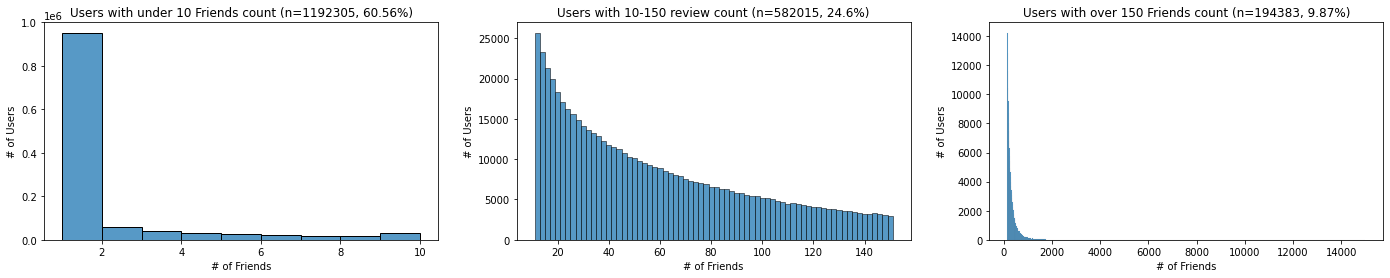

In [79]:
meduserThreshold = 10
superuserThreshold  = 150

smallFriendCount = [count for count in friendCount if count <= meduserThreshold]
medFriendCount = [count for count in friendCount if meduserThreshold < count <= superuserThreshold]
bigFriendCount = [count for count in friendCount if superuserThreshold < count]

smallFriendPercent = round(len(smallFriendCount)/len(friendCount)*100,2)
medFriendPercent = round(len(medFriendCount)/len(friendCount)*100,2)
bigFriendPercent = round(len(bigFriendCount)/len(friendCount)*100,2)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24,4))
sns.histplot(smallFriendCount, binwidth=1, ax=ax1)
sns.histplot(medFriendCount, binwidth=2, ax=ax2)
sns.histplot(bigFriendCount, binwidth=10, ax=ax3)

ax1.set(title=f'Users with under {meduserThreshold} Friends count (n={len(smallFriendCount)}, {smallFriendPercent}%)', xlabel='# of Friends', ylabel='# of Users')
ax2.set(title=f'Users with {meduserThreshold}-{superuserThreshold} review count (n={len(medFriendCount)}, {medReviewPercent}%)', xlabel='# of Friends', ylabel='# of Users')
ax3.set(title=f'Users with over {superuserThreshold} Friends count (n={len(bigFriendCount)}, {bigFriendPercent}%)', xlabel='# of Friends', ylabel='# of Users')
plt.show()